Import necessary libraries for program

In [100]:
import sqlite3
import pandas as pd
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.api as sm


Import World Values Survey (WVS) data csv file.

In [2]:
wvs = pd.read_csv('WVS_Wave_7.csv')

Select columns from the WVS dataset for analysis.
Print columns to ensure all are present and appear as expected.

In [3]:
wvs1 = wvs[['YEAR', 'COUNTRY', 'SECVAL', 'SKEPTICISM', 'RELATIVISM', 'DISBELIEF', 'DEFIANCE', 'EMVAL', 'AUTONOMY', 'EQUALITY', 'CHOICE', 'VOICE']]
print(wvs1.head())

   YEAR  COUNTRY    SECVAL  SKEPTICISM  RELATIVISM  DISBELIEF  DEFIANCE  \
0  2018       20  0.287062     0.09900         0.0   0.666667   0.38258   
1  2018       20  0.467525     0.65010         0.0   1.000000   0.22000   
2  2018       20  0.425304     0.37455         0.0   0.886667   0.44000   
3  2018       20  0.556170     0.65010         0.0   1.000000   0.57458   
4  2018       20  0.458949     0.37455         0.0   0.886667   0.57458   

      EMVAL  AUTONOMY  EQUALITY    CHOICE  VOICE  
0  0.413241  0.666667  0.690000  0.296296  0.000  
1  0.519722  0.000000  0.690000  0.888889  0.500  
2  0.692917  1.000000  0.690000  0.666667  0.415  
3  0.481065  0.000000  0.916667  0.592593  0.415  
4  0.475741  0.333333  0.690000  0.629630  0.250  


Filter WVS data to the year 2018.
Check for null values in the dataset.

In [4]:
wvs1_1 = wvs1[wvs1['YEAR']==2018]
wvs1_1.isnull().sum()

YEAR             0
COUNTRY          0
SECVAL         108
SKEPTICISM    1584
RELATIVISM     321
DISBELIEF      207
DEFIANCE       121
EMVAL          172
AUTONOMY       262
EQUALITY       257
CHOICE         626
VOICE          702
dtype: int64

Drop all rows with null values.
Verify null values were dropped.

In [5]:
wvs1_2 = wvs1_1.dropna()
wvs1_2.isnull().sum()

YEAR          0
COUNTRY       0
SECVAL        0
SKEPTICISM    0
RELATIVISM    0
DISBELIEF     0
DEFIANCE      0
EMVAL         0
AUTONOMY      0
EQUALITY      0
CHOICE        0
VOICE         0
dtype: int64

Create a group-by function to group the WVS individual data values into mean values per country.

In [6]:
def group_country(df, group_column, aggregate_columns, aggregation_function):
    grouped_data = df.groupby(group_column)
    aggregated_data = grouped_data[aggregate_columns].agg(aggregation_function).reset_index()
    return aggregated_data

Execute group-by function.

In [7]:
wvs2 = group_country(wvs1_2, 'COUNTRY', ['SECVAL', 'SKEPTICISM', 'RELATIVISM', 'DISBELIEF', 'DEFIANCE', 'EMVAL', 'AUTONOMY', 
'EQUALITY', 'CHOICE', 'VOICE'], 'mean')
print(wvs2)

    COUNTRY    SECVAL  SKEPTICISM  RELATIVISM  DISBELIEF  DEFIANCE     EMVAL  \
0        20  0.413194    0.448804    0.219285   0.667209  0.317477  0.626541   
1        36  0.395258    0.339224    0.309231   0.669868  0.262710  0.635447   
2        50  0.235192    0.357076    0.364076   0.134763  0.084851  0.304735   
3        76  0.349197    0.488119    0.340013   0.305799  0.262857  0.467840   
4       152  0.453430    0.554427    0.454841   0.537442  0.267009  0.473926   
5       156  0.399067    0.250562    0.230064   0.836870  0.278773  0.392697   
6       170  0.337688    0.603700    0.321053   0.306217  0.119784  0.426456   
7       218  0.323261    0.492935    0.428717   0.293945  0.077446  0.385682   
8       276  0.384152    0.376038    0.246391   0.604469  0.309709  0.679652   
9       344  0.507181    0.412475    0.416534   0.742419  0.457297  0.497834   
10      360  0.250945    0.307360    0.374552   0.112200  0.209668  0.333719   
11      368  0.341107    0.440911    0.5

Convert Country column to string datatype to allow for storage of country names once decoded.

In [8]:
wvs2['COUNTRY'] = wvs2['COUNTRY'].astype('string')
print(wvs2.dtypes)

COUNTRY       string[python]
SECVAL               float64
SKEPTICISM           float64
RELATIVISM           float64
DISBELIEF            float64
DEFIANCE             float64
EMVAL                float64
AUTONOMY             float64
EQUALITY             float64
CHOICE               float64
VOICE                float64
dtype: object


Set Country as the index for the dataframe.

In [9]:
wvs2 = wvs2.set_index('COUNTRY')
wvs2

,SECVAL,SKEPTICISM,RELATIVISM,DISBELIEF,DEFIANCE,EMVAL,AUTONOMY,EQUALITY,CHOICE,VOICE
COUNTRY,,,,,,,,,,
20,0.413194,0.448804,0.219285,0.667209,0.317477,0.626541,0.470808,0.821144,0.716493,0.497649
36,0.395258,0.339224,0.309231,0.669868,0.262710,0.635447,0.565234,0.818340,0.693670,0.464546
50,0.235192,0.357076,0.364076,0.134763,0.084851,0.304735,0.425847,0.386657,0.107031,0.299406
76,0.349197,0.488119,0.340013,0.305799,0.262857,0.467840,0.327109,0.668469,0.395836,0.479944
152,0.453430,0.554427,0.454841,0.537442,0.267009,0.473926,0.396104,0.607169,0.461524,0.430907
156,0.399067,0.250562,0.230064,0.836870,0.278773,0.392697,0.647668,0.537589,0.203605,0.181868
170,0.337688,0.603700,0.321053,0.306217,0.119784,0.426456,0.328728,0.631724,0.300755,0.444615
218,0.323261,0.492935,0.428717,0.293945,0.077446,0.385682,0.262496,0.599698,0.279999,0.400532
276,0.384152,0.376038,0.246391,0.604469,0.309709,0.679652,0.609068,0.800839,0.657088,0.651613


Decode the country codes to replace numeric value with country name.

In [10]:
wvs2_1 = wvs2.rename(index={"20": "Andorra", "36": "Australia", "50": "Bangladesh", "76": "Brazil", "152": "Chile", "156": "China",
"170": "Colombia", "218": "Ecuador", "422": "Lebanon", "458": "Malaysia", "484": "Mexico", "566": "Nigeria", "586": "Pakistan", "604": "Peru",
"818": "Egypt", "276": "Germany", "344": "Hong Kong SAR", "360": "Indonesia", "368": "Iraq", "400": "Jordan", "398": "Kazakhstan", "630": "Puerto Rico", "642": "Romania", "410": "South Korea", "764": "Thailand",
"792": "Turkey"})
print(wvs2_1)

                 SECVAL  SKEPTICISM  RELATIVISM  DISBELIEF  DEFIANCE  \
COUNTRY                                                                
Andorra        0.413194    0.448804    0.219285   0.667209  0.317477   
Australia      0.395258    0.339224    0.309231   0.669868  0.262710   
Bangladesh     0.235192    0.357076    0.364076   0.134763  0.084851   
Brazil         0.349197    0.488119    0.340013   0.305799  0.262857   
Chile          0.453430    0.554427    0.454841   0.537442  0.267009   
China          0.399067    0.250562    0.230064   0.836870  0.278773   
Colombia       0.337688    0.603700    0.321053   0.306217  0.119784   
Ecuador        0.323261    0.492935    0.428717   0.293945  0.077446   
Germany        0.384152    0.376038    0.246391   0.604469  0.309709   
Hong Kong SAR  0.507181    0.412475    0.416534   0.742419  0.457297   
Indonesia      0.250945    0.307360    0.374552   0.112200  0.209668   
Iraq           0.341107    0.440911    0.543966   0.270702  0.10

Reset to standard index in preparation to create table in SQLite.

In [11]:
wvs3 = wvs2_1.reset_index()
wvs3

,COUNTRY,SECVAL,SKEPTICISM,RELATIVISM,DISBELIEF,DEFIANCE,EMVAL,AUTONOMY,EQUALITY,CHOICE,VOICE
0,Andorra,0.413194,0.448804,0.219285,0.667209,0.317477,0.626541,0.470808,0.821144,0.716493,0.497649
1,Australia,0.395258,0.339224,0.309231,0.669868,0.262710,0.635447,0.565234,0.818340,0.693670,0.464546
2,Bangladesh,0.235192,0.357076,0.364076,0.134763,0.084851,0.304735,0.425847,0.386657,0.107031,0.299406
3,Brazil,0.349197,0.488119,0.340013,0.305799,0.262857,0.467840,0.327109,0.668469,0.395836,0.479944
4,Chile,0.453430,0.554427,0.454841,0.537442,0.267009,0.473926,0.396104,0.607169,0.461524,0.430907
5,China,0.399067,0.250562,0.230064,0.836870,0.278773,0.392697,0.647668,0.537589,0.203605,0.181868
6,Colombia,0.337688,0.603700,0.321053,0.306217,0.119784,0.426456,0.328728,0.631724,0.300755,0.444615
7,Ecuador,0.323261,0.492935,0.428717,0.293945,0.077446,0.385682,0.262496,0.599698,0.279999,0.400532
8,Germany,0.384152,0.376038,0.246391,0.604469,0.309709,0.679652,0.609068,0.800839,0.657088,0.651613
9,Hong Kong SAR,0.507181,0.412475,0.416534,0.742419,0.457297,0.497834,0.552212,0.599864,0.424178,0.415081


Read in World Happiness Report (WHR) data csv file.
Select columns of interest for analysis.
Print columns to ensure all are present and appear as expected.

In [12]:
whr = pd.read_csv('WHR20_Data.csv')
whr1 = whr[['country', 'year', 'happiness']]
print(whr1.head())

       country  year  happiness
0  Afghanistan  2008   3.723590
1  Afghanistan  2009   4.401778
2  Afghanistan  2010   4.758381
3  Afghanistan  2011   3.831719
4  Afghanistan  2012   3.782938


Filter WHR by year 2018.
Check dataset for null values.

In [13]:
whr1_1 = whr1[whr1['year']==2018]
whr1_1.isnull().sum()

country      0
year         0
happiness    0
dtype: int64

Drop the year column as it is no longer needed.
Verify column was dropped.

In [14]:
whr2 = whr1_1.drop('year', axis=1)
whr2

,country,happiness
10,Afghanistan,2.694303
22,Albania,5.004403
30,Algeria,5.043086
48,Argentina,5.792797
62,Armenia,5.062449
...,...,...
1793,Venezuela,5.005663
1807,Vietnam,5.295547
1819,Yemen,3.057514
1832,Zambia,4.041488


Connect to newly created Happiness SQL database.
Read WHR dataframe in to create a new table in database.

In [15]:
conn = sqlite3.connect('happiness_database.db')
table_whr = 'whr_2020'
whr2.to_sql(table_whr, conn, if_exists='replace', index=False)
conn.close()

Populate all data from WHR dataframe into the SQL table.

In [16]:
conn = sqlite3.connect('happiness_database.db')
cursor = conn.cursor()
cursor.execute(f"SELECT * FROM {table_whr}")
rows = cursor.fetchall()
for row in rows:
   print(row)
conn.close()

('Afghanistan', 2.694303274)
('Albania', 5.004402637)
('Algeria', 5.043086052)
('Argentina', 5.792796612)
('Armenia', 5.062448502)
('Australia', 7.17699337)
('Austria', 7.396001816)
('Azerbaijan', 5.167995453)
('Bangladesh', 4.499217033)
('Belarus', 5.233769894)
('Belgium', 6.89217186)
('Benin', 5.81982708)
('Bolivia', 5.915734291)
('Bosnia and Herzegovina', 5.887401104)
('Botswana', 3.4613657)
('Brazil', 6.190921783)
('Bulgaria', 5.098813534)
('Burkina Faso', 4.92723608)
('Burundi', 3.775283098)
('Cambodia', 5.121837616)
('Cameroon', 5.250737667)
('Canada', 7.175496578)
('Chad', 4.486325264)
('Chile', 6.436220646)
('China', 5.131433964)
('Colombia', 5.983512402)
('Comoros', 3.972819567)
('Congo (Brazzaville)', 5.490214348)
('Costa Rica', 7.141074657)
('Croatia', 5.536271095)
('Cyprus', 6.276443005)
('Czech Republic', 7.034165382)
('Denmark', 7.648785591)
('Dominican Republic', 5.433215618)
('Ecuador', 6.128010273)
('Egypt', 4.005450726)
('El Salvador', 6.241199493)
('Estonia', 6.09130

Connect to newly created Happiness SQL database.
Read WVS dataframe in to create a new table in database.

In [17]:
#conn = sqlite3.connect('happiness_database.db')
#table_wvs = 'wvs_wave7'
#wvs3.to_sql(table_wvs, conn, if_exists='replace', index=False)
#conn.close()

Populate data from WVS dataframe into SQL table.

In [18]:
#conn = sqlite3.connect('happiness_database.db')
#ursor = conn.cursor()
#cursor.execute(f"SELECT * FROM {table_wvs}")
#rows = cursor.fetchall()
#for row in rows:
#    print(row)
#conn.close()

Create new SQL table for joined WHR and WVS data.
Perform inner join on WHR and WVS data joining on the Country column as Primary Key.


In [19]:
#conn = sqlite3.connect('happiness_database.db')
#cursor = conn.cursor()
#cursor.execute(f"CREATE TABLE {'whr_wvs2'} AS SELECT * FROM {table_wvs} INNER JOIN {table_whr} USING ('COUNTRY')")
#rows = cursor.fetchall()
#for row in rows:
#   print(row)
#conn.close()

Verify all tables have been created and are present.

In [20]:
#conn = sqlite3.connect('happiness_database.db')
#cursor = conn.cursor()
#cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table';")
#tables = cursor.fetchall()
#for table in tables:
 #   print(table)
#conn.commit()
#conn.close()

Export joined WHR and WVS dataset to csv  file for analysis.

In [21]:
#conn = sqlite3.connect('happiness_database.db')
#cursor = conn.cursor()
#cursor.execute("select * from whr_wvs2")
#with open("whr_wvs2.csv", "w") as csv_file:
#    csv_writer = csv.writer(csv_file, delimiter=",")
#    csv_writer.writerow([i[0] for i in cursor.description])
#    csv_writer.writerows(cursor)
#conn.close()

Read in joined WHR and WVS dataset for analysis.
Verify dataframe appears as expected and all columns are present.

In [22]:
whr_wvs = pd.read_csv('whr_wvs2.csv')
whr_wvs

,COUNTRY,SECVAL,SKEPTICISM,RELATIVISM,DISBELIEF,DEFIANCE,EMVAL,AUTONOMY,EQUALITY,CHOICE,VOICE,happiness
0,Australia,0.395258,0.339224,0.309231,0.669868,0.262710,0.635447,0.565234,0.818340,0.693670,0.464546,7.176993
1,Bangladesh,0.235192,0.357076,0.364076,0.134763,0.084851,0.304735,0.425847,0.386657,0.107031,0.299406,4.499217
2,Brazil,0.349197,0.488119,0.340013,0.305799,0.262857,0.467840,0.327109,0.668469,0.395836,0.479944,6.190922
3,Chile,0.453430,0.554427,0.454841,0.537442,0.267009,0.473926,0.396104,0.607169,0.461524,0.430907,6.436221
4,China,0.399067,0.250562,0.230064,0.836870,0.278773,0.392697,0.647668,0.537589,0.203605,0.181868,5.131434
5,Colombia,0.337688,0.603700,0.321053,0.306217,0.119784,0.426456,0.328728,0.631724,0.300755,0.444615,5.983512
6,Ecuador,0.323261,0.492935,0.428717,0.293945,0.077446,0.385682,0.262496,0.599698,0.279999,0.400532,6.128010
7,Germany,0.384152,0.376038,0.246391,0.604469,0.309709,0.679652,0.609068,0.800839,0.657088,0.651613,7.118364
8,Indonesia,0.250945,0.307360,0.374552,0.112200,0.209668,0.333719,0.439794,0.388726,0.106725,0.399628,5.340296
9,Iraq,0.341107,0.440911,0.543966,0.270702,0.108848,0.263391,0.230460,0.366491,0.219371,0.237241,5.099590


Set index to Country to prepare for analysis.

In [23]:
whr_wvs = whr_wvs.set_index('COUNTRY')
whr_wvs

,SECVAL,SKEPTICISM,RELATIVISM,DISBELIEF,DEFIANCE,EMVAL,AUTONOMY,EQUALITY,CHOICE,VOICE,happiness
COUNTRY,,,,,,,,,,,
Australia,0.395258,0.339224,0.309231,0.669868,0.262710,0.635447,0.565234,0.818340,0.693670,0.464546,7.176993
Bangladesh,0.235192,0.357076,0.364076,0.134763,0.084851,0.304735,0.425847,0.386657,0.107031,0.299406,4.499217
Brazil,0.349197,0.488119,0.340013,0.305799,0.262857,0.467840,0.327109,0.668469,0.395836,0.479944,6.190922
Chile,0.453430,0.554427,0.454841,0.537442,0.267009,0.473926,0.396104,0.607169,0.461524,0.430907,6.436221
China,0.399067,0.250562,0.230064,0.836870,0.278773,0.392697,0.647668,0.537589,0.203605,0.181868,5.131434
Colombia,0.337688,0.603700,0.321053,0.306217,0.119784,0.426456,0.328728,0.631724,0.300755,0.444615,5.983512
Ecuador,0.323261,0.492935,0.428717,0.293945,0.077446,0.385682,0.262496,0.599698,0.279999,0.400532,6.128010
Germany,0.384152,0.376038,0.246391,0.604469,0.309709,0.679652,0.609068,0.800839,0.657088,0.651613,7.118364
Indonesia,0.250945,0.307360,0.374552,0.112200,0.209668,0.333719,0.439794,0.388726,0.106725,0.399628,5.340296


Define function to create individual scatterplots for each represented index and happiness score.

In [84]:
def scatter(df, x, y, xlabel, ylabel, xlimits=None, ylimits=None, figsize=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize)

    ax.scatter(x=df[x], y=df[y])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if xlimits:
        plt.xlim(xlimits)
    if ylimits:
        plt.ylim(ylimits)

    plt.show()

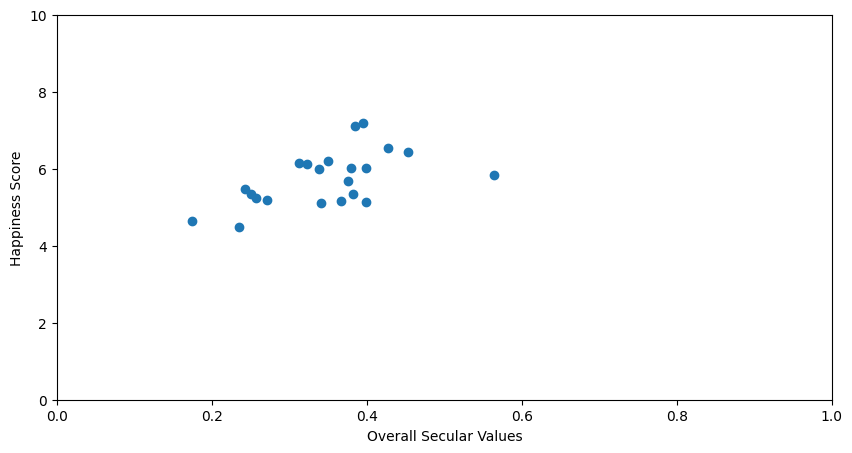

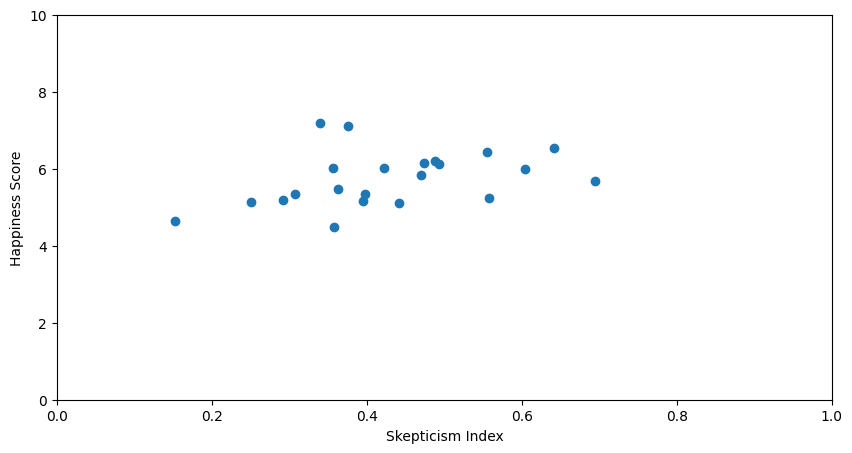

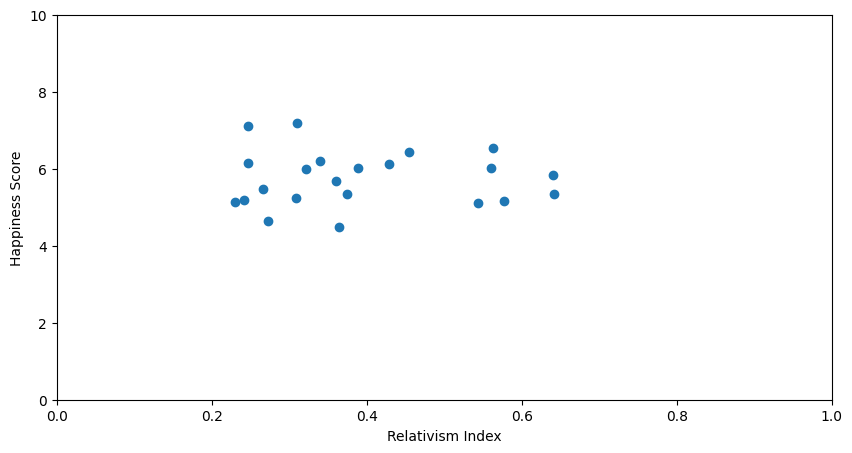

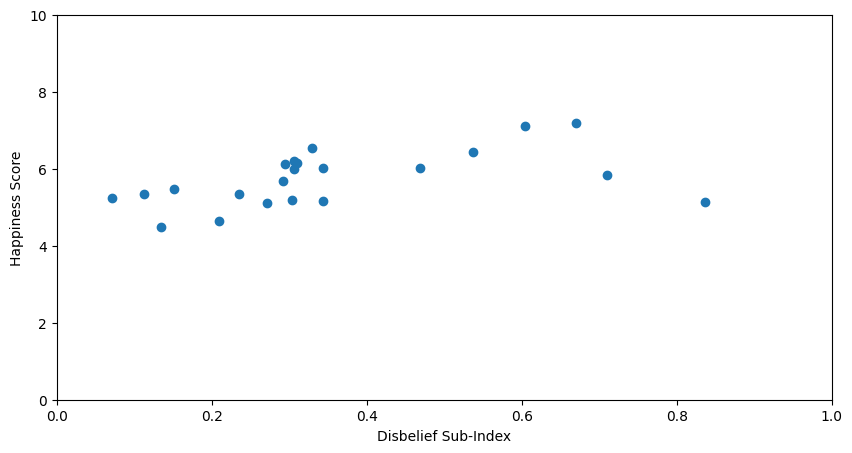

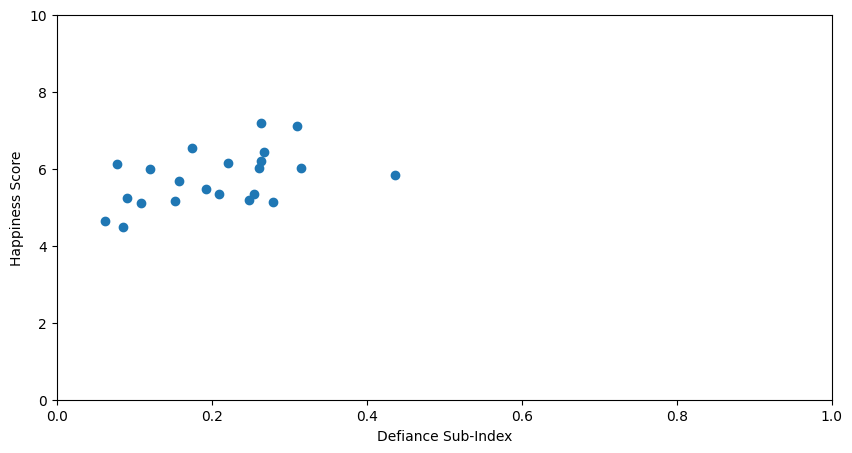

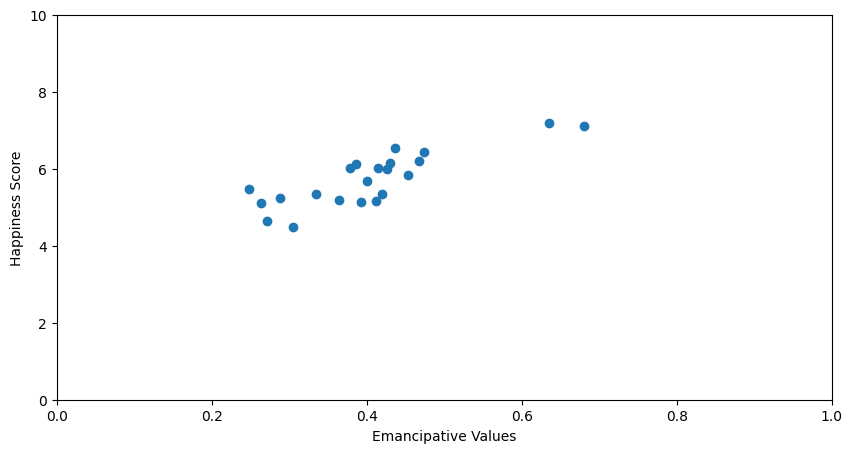

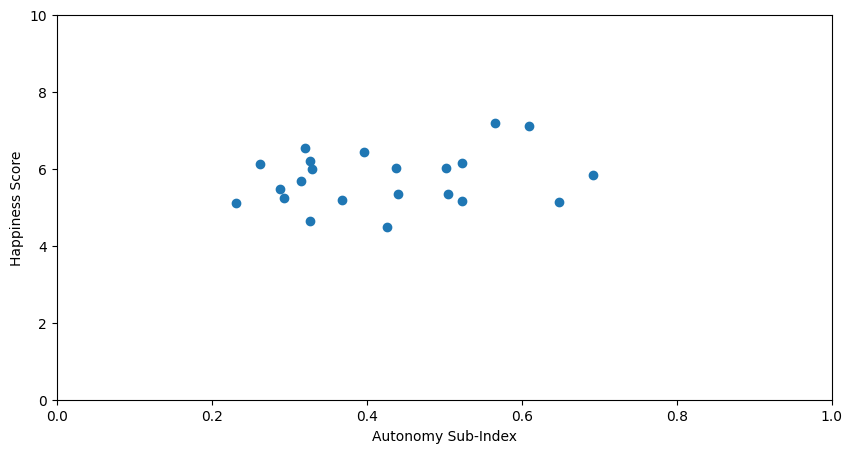

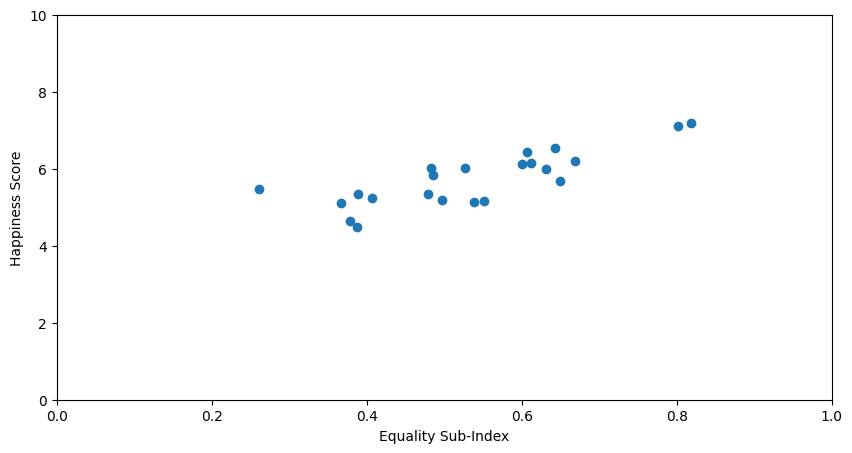

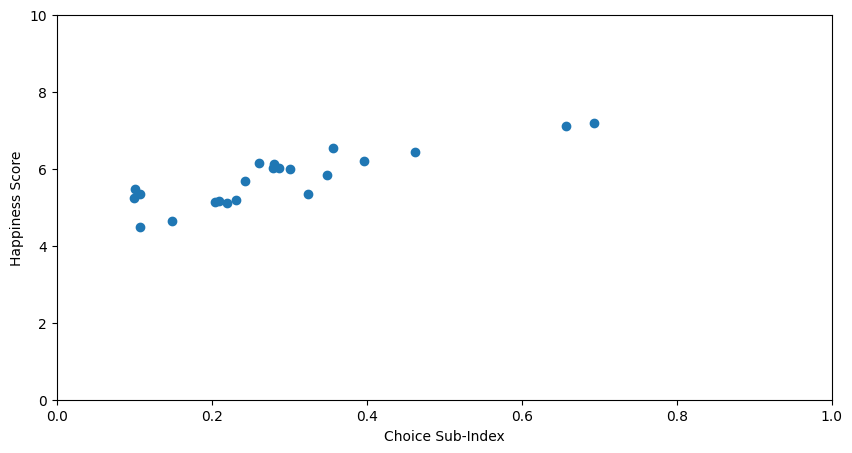

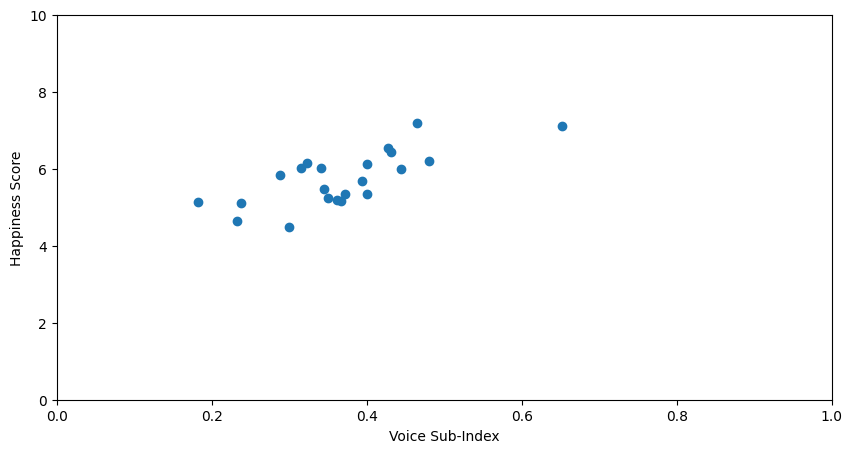

In [85]:
scatter(whr_wvs, x=['SECVAL'], y=['happiness'], xlabel='Overall Secular Values', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['SKEPTICISM'], y=['happiness'], xlabel='Skepticism Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['RELATIVISM'], y=['happiness'], xlabel='Relativism Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['DISBELIEF'], y=['happiness'], xlabel='Disbelief Sub-Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['DEFIANCE'], y=['happiness'], xlabel='Defiance Sub-Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['EMVAL'], y=['happiness'], xlabel='Emancipative Values', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['AUTONOMY'], y=['happiness'], xlabel='Autonomy Sub-Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['EQUALITY'], y=['happiness'], xlabel='Equality Sub-Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['CHOICE'], y=['happiness'], xlabel='Choice Sub-Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])
scatter(whr_wvs, x=['VOICE'], y=['happiness'], xlabel='Voice Sub-Index', ylabel='Happiness Score', xlimits=[0.0,1.0], ylimits=[0,10])



Define independent (y) and dependent (x) variables.  Divide data into subsets in order to train and test the regression model.

In [115]:
y = whr_wvs['happiness']
x = whr_wvs[['SECVAL', 'SKEPTICISM', 'RELATIVISM', 'DISBELIEF', 'DEFIANCE', 'EMVAL', 'AUTONOMY', 'EQUALITY', 'CHOICE', 'VOICE']]
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

Fit the regression model.

In [116]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     12.21
Date:                Sat, 15 Mar 2025   Prob (F-statistic):             0.0139
Time:                        19:12:27   Log-Likelihood:                 10.880
No. Observations:                  15   AIC:                            0.2392
Df Residuals:                       4   BIC:                             8.028
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4497      0.850      4.059      0.0

c:\Users\spaul\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


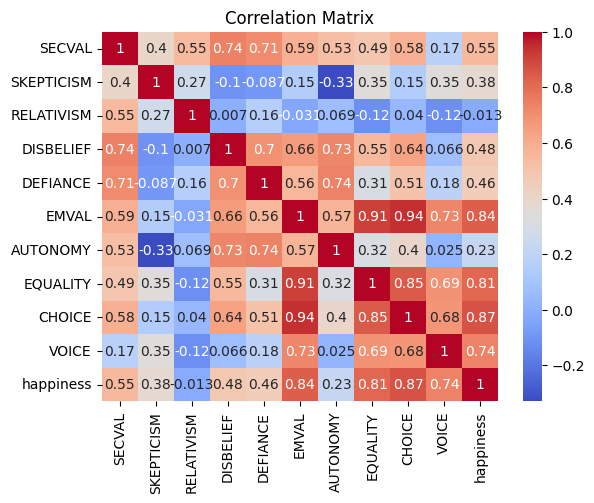

In [108]:
correlation_matrix = whr_wvs.corr()
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()